In [113]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from DLC_for_WBFM.utils.projects.utils_filenames import pickle_load_binary
from tqdm.auto import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_segmentation_metadata=True)

Output files for annotator: /scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/manual_annotation/global2tracklet_manual.pickle, /scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/manual_annotation/manually_split_tracklets.h5, /scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/manual_annotation/split_names.pickle, /scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm10-gui_test 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
behavior_annotations:     False
============Training================
df_training_tracklets:    True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             

In [36]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/global_tracklet_neuron_graph.pickle"
global_tracklet_neuron_graph = pickle_load_binary(fname)
fname = "/scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/final_matching.pickle"
final_matches = pickle_load_binary(fname)

In [32]:

fname = "/scratch/zimmer/Charles/dlc_stacks/worm10-gui_test/3-tracking/worm_obj.pickle"
worm_obj = pickle_load_binary(fname)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator OneClassSVM from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Look at tracklets and candidate tracklets for a neuron

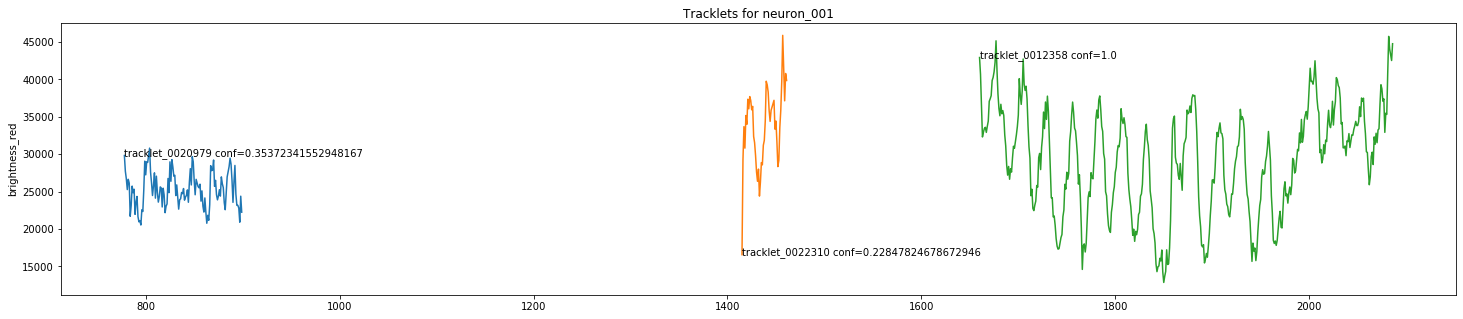

In [35]:
worm_obj.plot_tracklets_for_neuron('neuron_001', plot_field='brightness_red', diff_percentage=False)

In [24]:
%debug

> /home/charles/Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/utils/tracklets/tracklet_class.py(403)plot_tracklets_for_neuron()
    401             if diff_percentage:
    402                 y = y.diff() / y
--> 403                 # err
    404             plt.plot(y)
    405             plt.ylabel(plot_field)



ipdb>  np.max(y)


0.24778761061946902


ipdb>  np.min(y)


-0.30434782608695654


ipdb>  q


In [10]:
final_matches.get_mapping_0_to_1()['neuron_006']

['tracklet_0012498']

In [37]:
global_tracklet_neuron_graph

MatchesAsGraph object with 101 class A nodes and 294 class B nodes, with 294 edges

# Debug the basic function again

In [54]:
from DLC_for_WBFM.utils.external.utils_pandas import get_names_from_df
from DLC_for_WBFM.utils.neuron_matching.long_range_matching import extend_tracks_using_global_tracking
from DLC_for_WBFM.utils.tracklets.tracklet_class import TrackedWorm

In [80]:
verbose = 2

df_tracklets = project_data.df_all_tracklets
tracklets_and_neurons_class = project_data.tracklets_and_neurons_class
df_global_tracks = project_data.intermediate_global_tracks
df_training_data = project_data.df_training_tracklets

all_tracklet_names = get_names_from_df(df_tracklets)

worm_obj = TrackedWorm(detections=tracklets_and_neurons_class, verbose=verbose)
worm_obj.initialize_neurons_from_training_data(df_training_data)
worm_obj.initialize_all_neuron_tracklet_classifiers()

  0%|          | 0/101 [00:00<?, ?it/s]

In [107]:
DEBUG = True
out = extend_tracks_using_global_tracking(df_global_tracks, df_tracklets, worm_obj,
                                    min_overlap=5, min_confidence=0.05, outlier_threshold=1.0, verbose=3, DEBUG=DEBUG)


  0%|          | 0/18614 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

Checking global track neuron_001
Already used: tracklet_0020979
Already used: tracklet_0022310
Already used: tracklet_0016410
Already used: tracklet_0000793
Already used: tracklet_0003826
Already used: tracklet_0012358
Already used: tracklet_0012520
Already used: tracklet_0005227
Already used: tracklet_0020341
Already used: tracklet_0022331
Already used: tracklet_0020527
Already used: tracklet_0014466
Already used: tracklet_0011623
Already used: tracklet_0023863
Already used: tracklet_0018337
Already used: tracklet_0016676
Already used: tracklet_0014924
Already used: tracklet_0013450
Already used: tracklet_0013444
Already used: tracklet_0021921
Already used: tracklet_0009198
Already used: tracklet_0009717
Already used: tracklet_0020913
Already used: tracklet_0016140
Already used: tracklet_0009904
Already used: tracklet_0010748
Already used: tracklet_0016016
Already used: tracklet_0014320
Already used: tracklet_0010150
Already used: tracklet_0018353
Already used: tracklet_0014561
110 ca

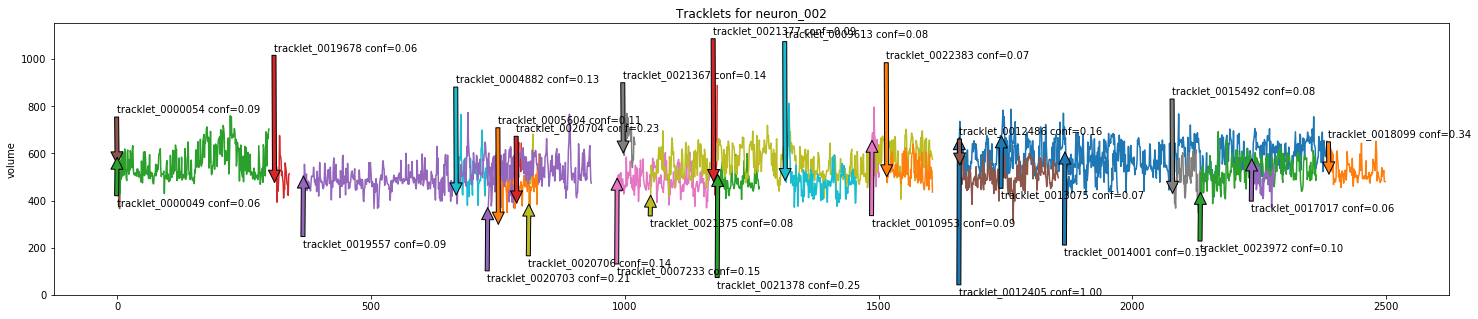

In [105]:
worm_obj.plot_tracklets_for_neuron('neuron_002', plot_field='volume')

In [102]:
%debug

> /home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/bezier.py(36)get_intersection()
     34     ad_bc = a * d - b * c
     35     if np.abs(ad_bc) < 1.0e-12:
---> 36         raise ValueError("Given lines do not intersect. Please verify that "
     37                          "the angles are not equal or differ by 180 degrees.")
     38 



ipdb>  q


In [66]:
neuron = worm_obj.global_name_to_neuron['neuron_002']

In [67]:
test_tracklet = df_tracklets['tracklet_0021375']
neuron.check_new_tracklet_using_classifier(test_tracklet.dropna())

(True, 0.8884892086330936)

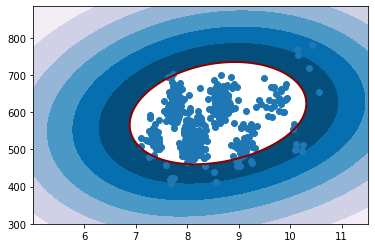

In [68]:
neuron.plot_classifier_boundary()
plt.scatter(test_tracklet['z'], test_tracklet['volume'])

In [130]:
coords = ['z', 'x', 'y']

name = 'neuron_002'
global_tracklet = df_global_tracks[name][coords][:-1].replace(0.0, np.nan).to_numpy(float)

name1 = 'tracklet_0021375'
tracklet1 = df_tracklets[name1][coords].replace(0.0, np.nan).to_numpy(float)

name2 = 'tracklet_0021378'
tracklet2 = df_tracklets[name2][coords].replace(0.0, np.nan).to_numpy(float)

In [131]:
# list_tracklets_zxy = [df_tracklets[name][coords].to_numpy() for name in tqdm(all_tracklet_names)]

In [132]:
from DLC_for_WBFM.utils.general.distance_functions import calc_global_track_to_tracklet_distances


Text(0.5, 1.0, 'CORRECT TRACKLET')

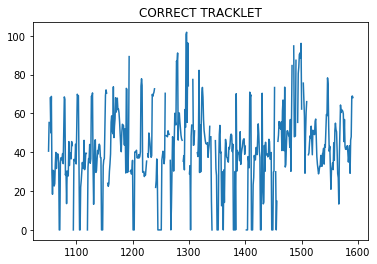

In [137]:
dist = calc_global_track_to_tracklet_distances(global_tracklet, [tracklet1])

plt.plot(dist[0])
plt.title("CORRECT TRACKLET")

Text(0.5, 1.0, 'WRONG TRACKLET')

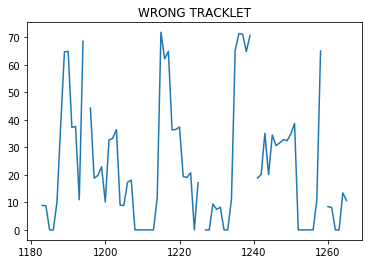

In [138]:
dist = calc_global_track_to_tracklet_distances(global_tracklet, [tracklet2])
plt.plot(dist[0])
plt.title("WRONG TRACKLET")